In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re
import string
import warnings
from pathlib import Path
from time import time

import arviz as az
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import pymc3 as pm
import seaborn as sns
from theano import tensor as tt

In [3]:
import src.modeling.simulation_based_calibration_helpers as sbc
from src.data_processing import achilles as achelp
from src.data_processing import common as dphelp
from src.io import cache_io
from src.loggers import logger
from src.modeling import pymc3_analysis as pmanal
from src.modeling import pymc3_sampling_api as pmapi
from src.models.speclet_seven import SpecletSeven
from src.plot.color_pal import FitMethodColors, ModelColors, SeabornColor
from src.project_enums import ModelFitMethod

In [4]:
notebook_tic = time()

warnings.simplefilter(action="ignore", category=UserWarning)

gg.theme_set(
    gg.theme_bw()
    + gg.theme(
        figure_size=(4, 4),
        axis_ticks_major=gg.element_blank(),
        strip_background=gg.element_blank(),
    )
)
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 838
np.random.seed(RANDOM_SEED)
HDI_PROB = 0.89

In [5]:
sp7 = SpecletSeven("expt", debug=True, noncentered_param=True)

In [6]:
sp7.cache_manager.mcmc_cache_exists()
sp7._reset_model_and_results()
sp7.cache_manager.clear_mcmc_cache()
sp7.cache_manager.mcmc_cache_exists()

[06/14/21 14:59:29] INFO     ArvizCacheManager: MCMC cache exists.      ]8;id=1623697169.1711638-335689;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:273

                    WARNING  Reseting all model and results.             ]8;id=1623697169.176527-775328;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:132

False

In [7]:
sbc_dir = sp7.cache_manager.cache_dir / "sbc"
sp7.run_simulation_based_calibration(
    results_path=sbc_dir,
    fit_method=ModelFitMethod.mcmc,
    random_seed=RANDOM_SEED,
    size="medium",
    fit_kwargs={
        "mcmc_draws": 1000,
        "tune": 1000,
        "chains": 4,
        "cores": 4,
        "target_accept": 0.95,
        "prior_pred_samples": 1000,
        "post_pred_samples": 1000,
    },
)

                    INFO     Generating mock data of size          ]8;id=1623697169.3287191-533195;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:305
                             'medium'.

                    INFO     Applying 2 data transformations.      ]8;id=1623697169.736869-401913;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:129

                    INFO     Applying transformation: '_drop_sgrna ]8;id=1623697169.740057-436761;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             s_that_map_to_multiple_genes'

                    WARNING  Dropping 0 sgRNA that map to multiple ]8;id=1623697169.863886-799389;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:249
                             genes.

                    INFO     Applying transformation:              ]8;id=1623697169.883601-994741;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             '_drop_missing_copynumber'

                    WARNING  Dropping 0 data points with missing   ]8;id=1623697169.9097788-829851;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:259
                             copy number.

                    INFO     Calling `model_specification()` method.     ]8;id=1623697169.925384-884866;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:172

                    INFO     Beginning PyMC3 model specification.        ]8;id=1623697169.933963-876446;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:157

                    INFO     Getting Theano shared variables.            ]8;id=1623697169.988171-327110;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:164

[06/14/21 14:59:30] INFO     Creating PyMC3 model for SpecletSeven.      ]8;id=1623697170.0268002-126412;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:179

[06/14/21 14:59:49] INFO     Applying 2 data transformations.      ]8;id=1623697189.072145-435770;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:129

                    INFO     Applying transformation: '_drop_sgrna ]8;id=1623697189.0769222-339796;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             s_that_map_to_multiple_genes'

                    WARNING  Dropping 0 sgRNA that map to multiple ]8;id=1623697189.108047-665802;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:249
                             genes.

                    INFO     Applying transformation:              ]8;id=1623697189.126119-268154;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             '_drop_missing_copynumber'

                    WARNING  Dropping 0 data points with missing   ]8;id=1623697189.147711-746122;file:///Users/admin/Lab_Projects/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:259
                             copy number.

                    INFO     Updating the MCMC sampling parameters.      ]8;id=1623697189.156409-10354;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:248

                    INFO     Beginning MCMC sampling.                    ]8;id=1623697189.182553-217977;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:277

/usr/local/Caskroom/miniconda/base/envs/speclet/lib/python3.9/site-packages/pymc3/sampling.py:466: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, a_offset, μ_a_offset, μ_μ_a_offset, σ_a, σ_σ_a, σ_μ_a, σ_σ_μ_a, σ_μ_μ_a, μ_μ_μ_a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 302 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


posterior predictive variable lfc's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


[06/14/21 15:05:36] INFO     Finished MCMC sampling - caching results.   ]8;id=1623697536.863085-276743;file:///Users/admin/Lab_Projects/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:290

                    INFO     Caching InferenceData to '/Users/admin/Lab ]8;id=1623697536.873821-31585;file:///Users/admin/Lab_Projects/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:245
                             _Projects/speclet/models/speclet-six_expt/                      
                             mcmc/inference-data.nc'.

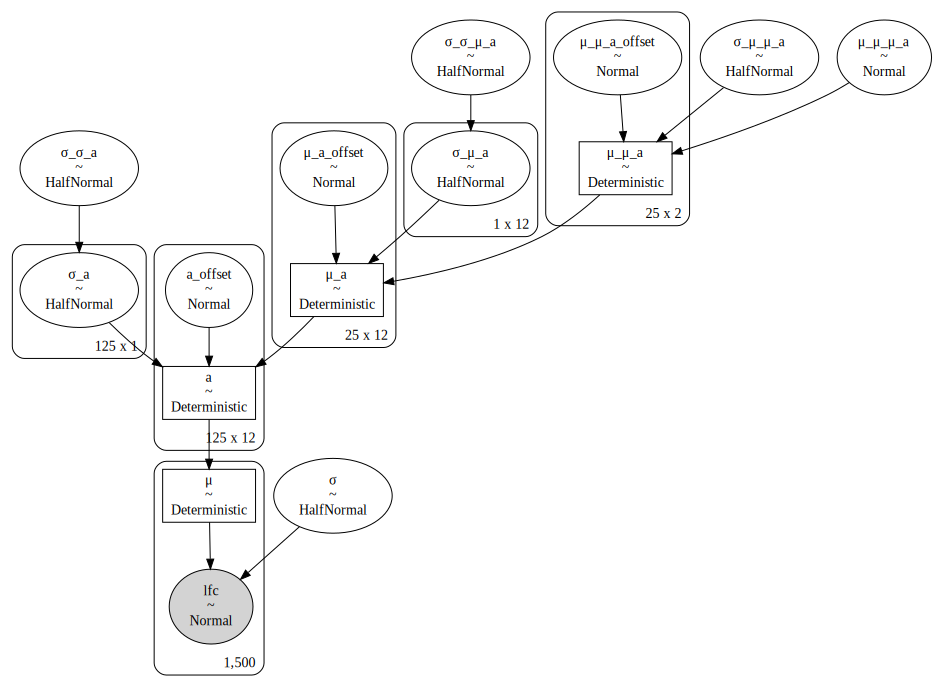

In [8]:
pm.model_to_graphviz(sp7.model)

## Visualization of the mock data

In [9]:
mock_data = sp7.data_manager.get_data()
mock_data.head()

,depmap_id,hugo_symbol,lineage,p_dna_batch,screen,sgrna,copy_number,rna_expr,is_mutated,lfc
0,cellline0,gene0,lineage0,batch0,screen0,gene0_sgrna0,1.114439,10.173267,False,3.977941
1,cellline0,gene0,lineage0,batch0,screen0,gene0_sgrna1,0.923248,3.863647,False,6.107790
2,cellline0,gene0,lineage0,batch0,screen0,gene0_sgrna2,1.073789,6.853839,False,3.872656
3,cellline0,gene0,lineage0,batch0,screen0,gene0_sgrna3,0.818552,11.290591,False,5.056379
4,cellline0,gene0,lineage0,batch0,screen0,gene0_sgrna4,0.953009,4.898099,False,6.765692


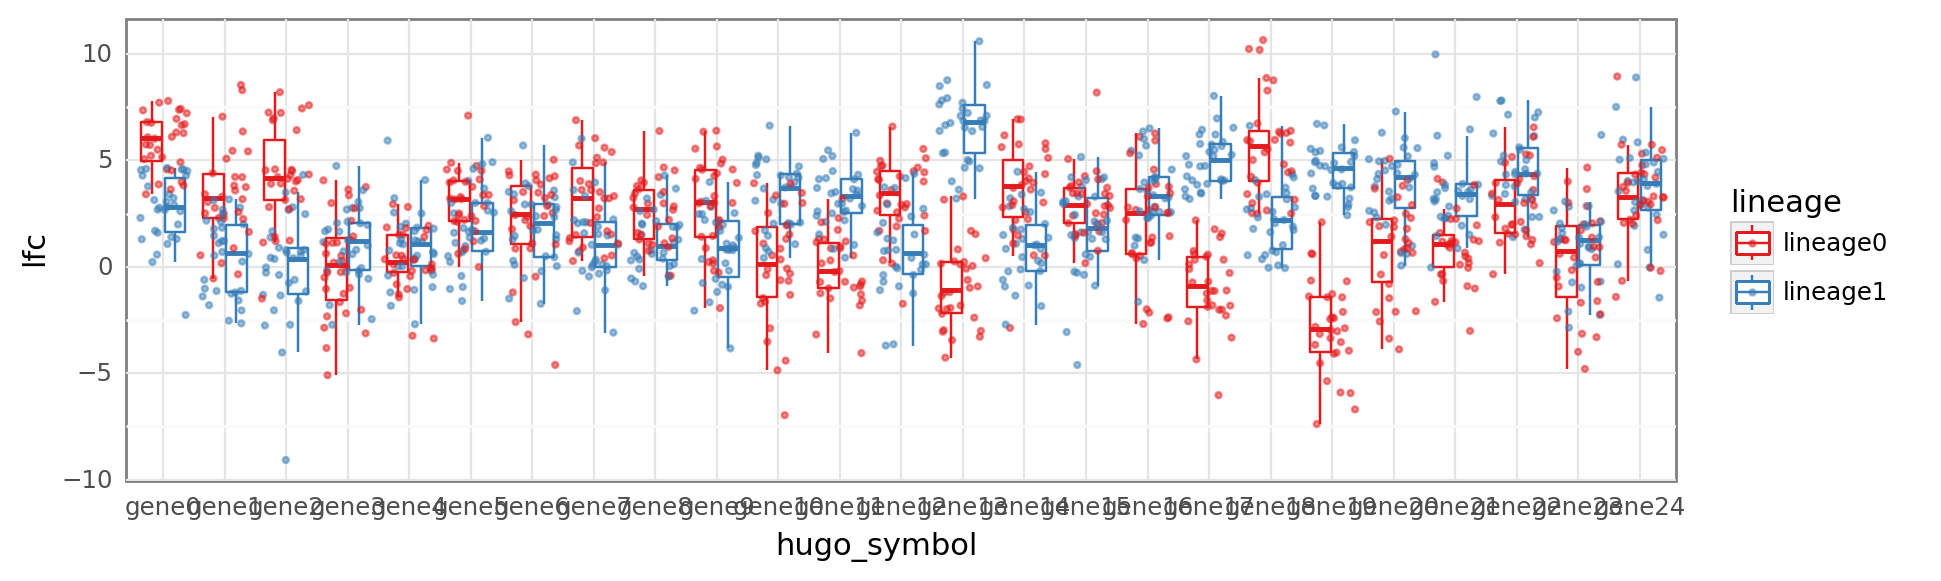

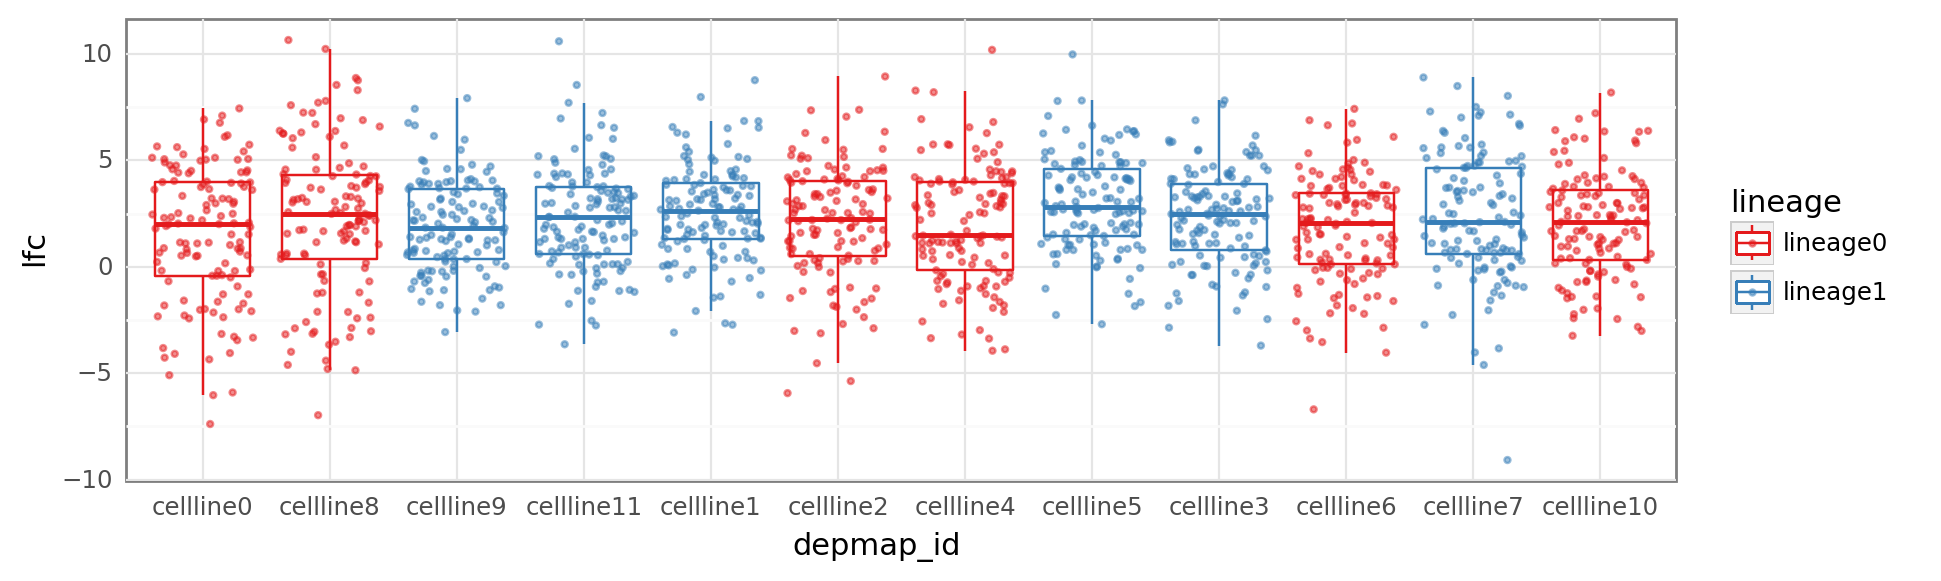

In [10]:
for x in ["hugo_symbol", "depmap_id"]:
    (
        gg.ggplot(mock_data, gg.aes(x=x, y="lfc"))
        + gg.geom_boxplot(gg.aes(color="lineage"), outlier_alpha=0)
        + gg.geom_jitter(gg.aes(color="lineage"), alpha=0.5, size=0.7)
        + gg.scale_color_brewer(type="qual", palette="Set1")
        + gg.theme(figure_size=(10, 3))
    ).draw()

## Model priors

In [11]:
with sp7.model:
    prior_dist = pm.sample_prior_predictive(random_seed=RANDOM_SEED)

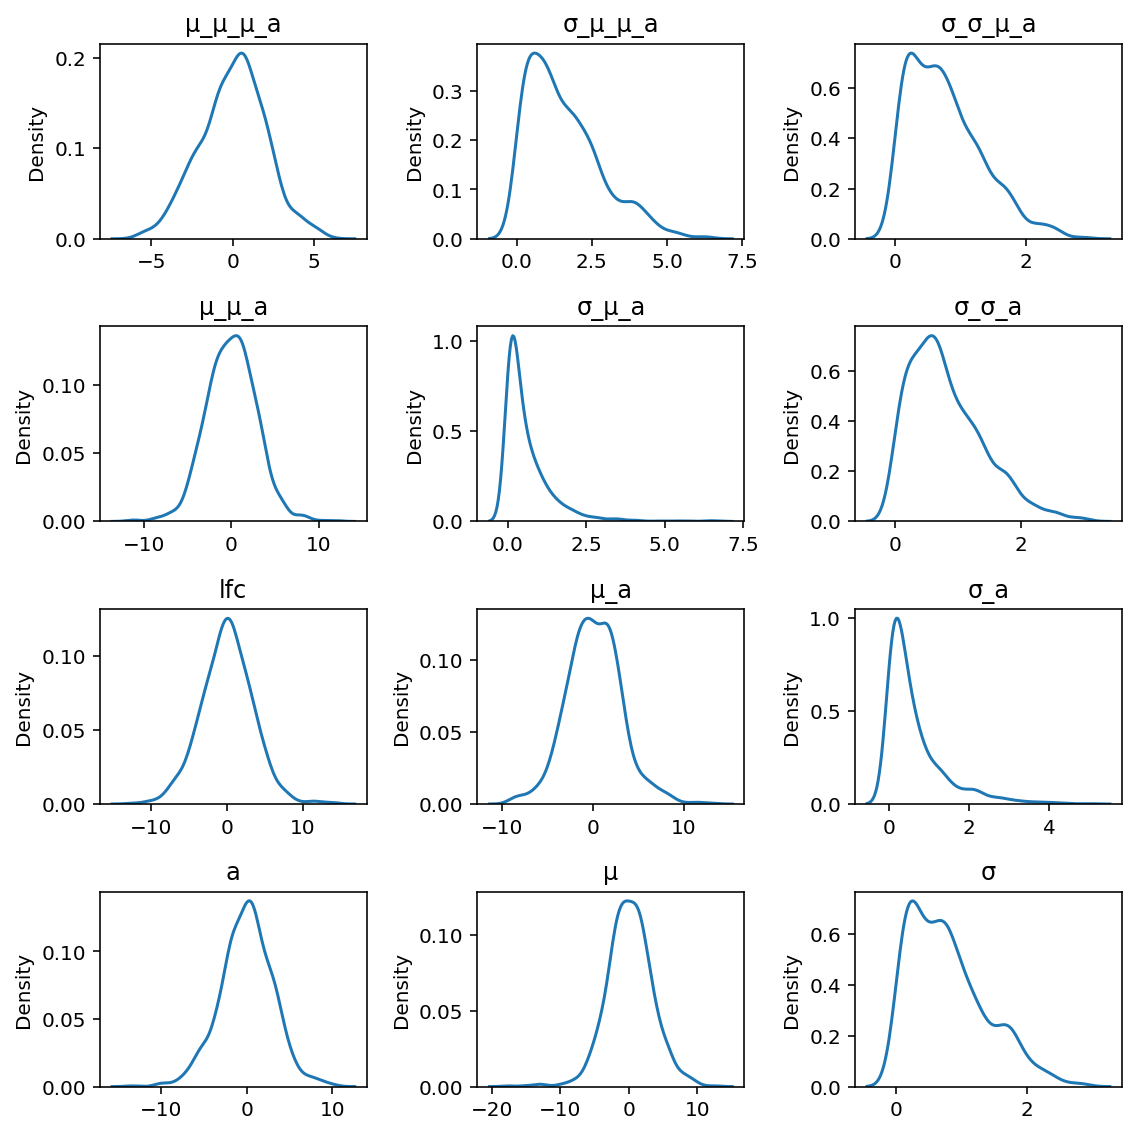

In [12]:
pmanal.plot_all_priors(prior_dist, (4, 3), (8, 8), rm_var_regex="log__|logodds_|offset");

## Model posterior estimates

In [13]:
sbc_manager = sbc.SBCFileManager(sbc_dir)

if sbc_manager.all_data_exists():
    sbc_res = sbc_manager.get_sbc_results()
else:
    FileNotFoundError("Could not locate SBC results data.")

mcmc_res = sbc_res.inference_obj

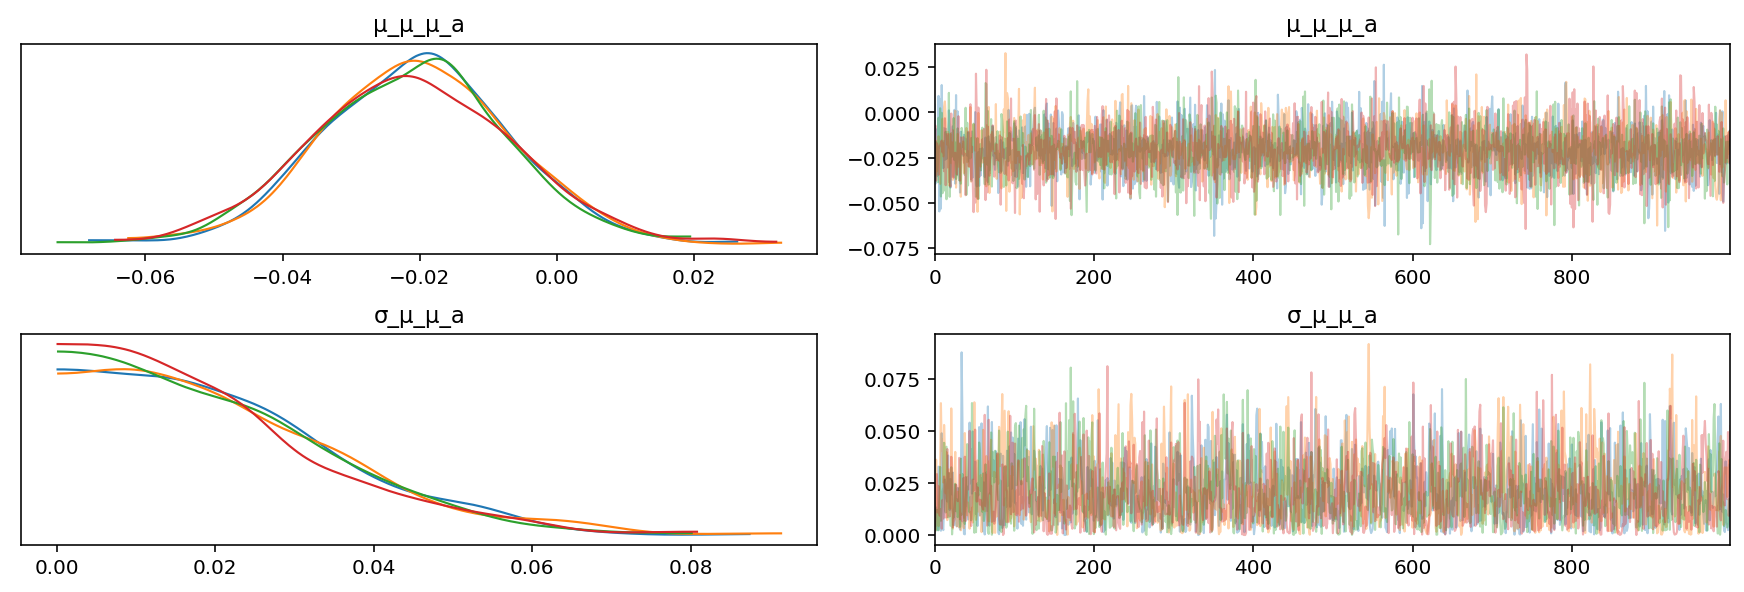

In [14]:
az.plot_trace(mcmc_res, var_names=["μ_μ_μ_a", "σ_μ_μ_a"], compact=False);

In [15]:
var_names = ["μ_μ_μ_a", "σ_μ_μ_a"]
az.summary(mcmc_res, var_names=var_names, hdi_prob=0.89).assign(
    real_value=np.array([sbc_res.priors[v] for v in var_names])
)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,real_value
μ_μ_μ_a,-0.021,0.014,-0.042,0.002,0.0,0.0,6584.0,3001.0,1.0,1.760227
σ_μ_μ_a,0.021,0.015,0.000,0.040,0.0,0.0,2006.0,2324.0,1.0,2.017551


In [16]:
cell_lines = mock_data["depmap_id"].cat.categories.values
genes = mock_data["hugo_symbol"].cat.categories.values

In [17]:
gene_lineage_priors = pd.DataFrame(
    {
        "prior_effect": sbc_res.priors["μ_a"].squeeze().flatten(),
        "hugo_symbol": np.repeat(genes, len(cell_lines)),
        "depmap_id": np.tile(cell_lines, len(genes)),
    }
)

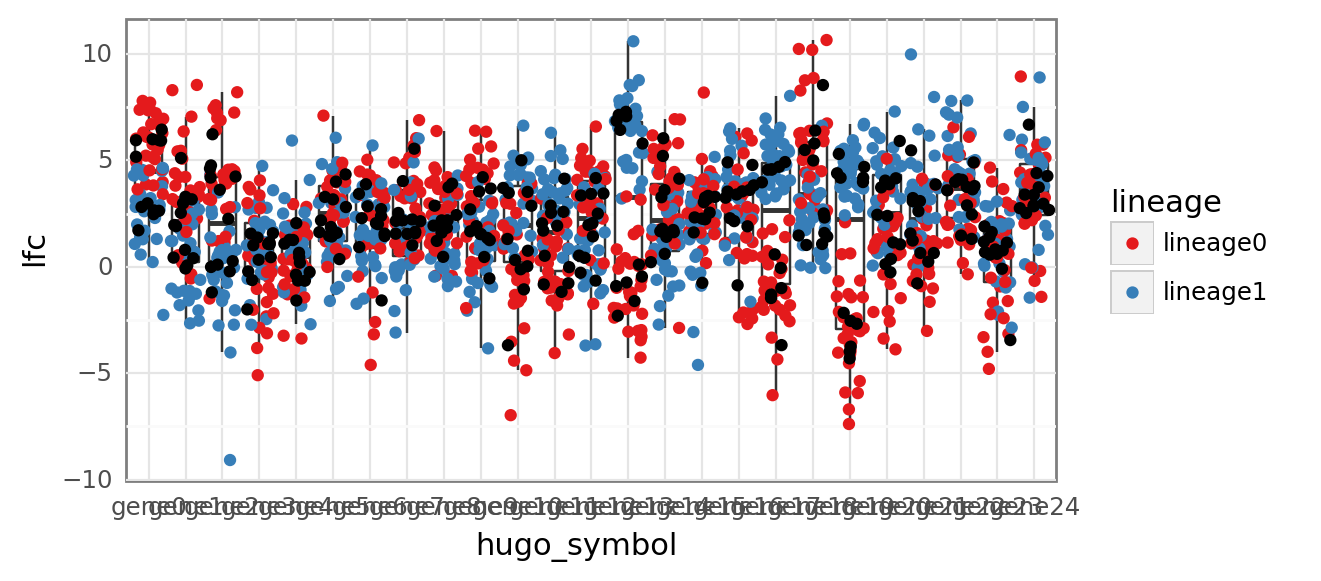

<ggplot: (358900282)>

In [18]:
(
    gg.ggplot(mock_data, gg.aes(x="hugo_symbol", y="lfc"))
    + gg.geom_boxplot(outlier_alpha=0)
    + gg.geom_jitter(gg.aes(color="lineage"))
    + gg.geom_jitter(
        gg.aes(x="hugo_symbol", y="prior_effect"),
        data=gene_lineage_priors,
        color="black",
    )
    + gg.scale_color_brewer(type="qual", palette="Set1")
    + gg.theme(figure_size=(6, 3))
)

In [19]:
sbc_res.inference_obj.posterior["μ_a"][0, :, :, :].std(axis=0).values.mean(axis=0)

array([0.06110712, 0.0593744 , 0.04693255, 0.05468984, 0.04547248,
       0.05236487, 0.07472526, 0.0676917 , 0.05646506, 0.06086063,
       0.05827364, 0.04596535])

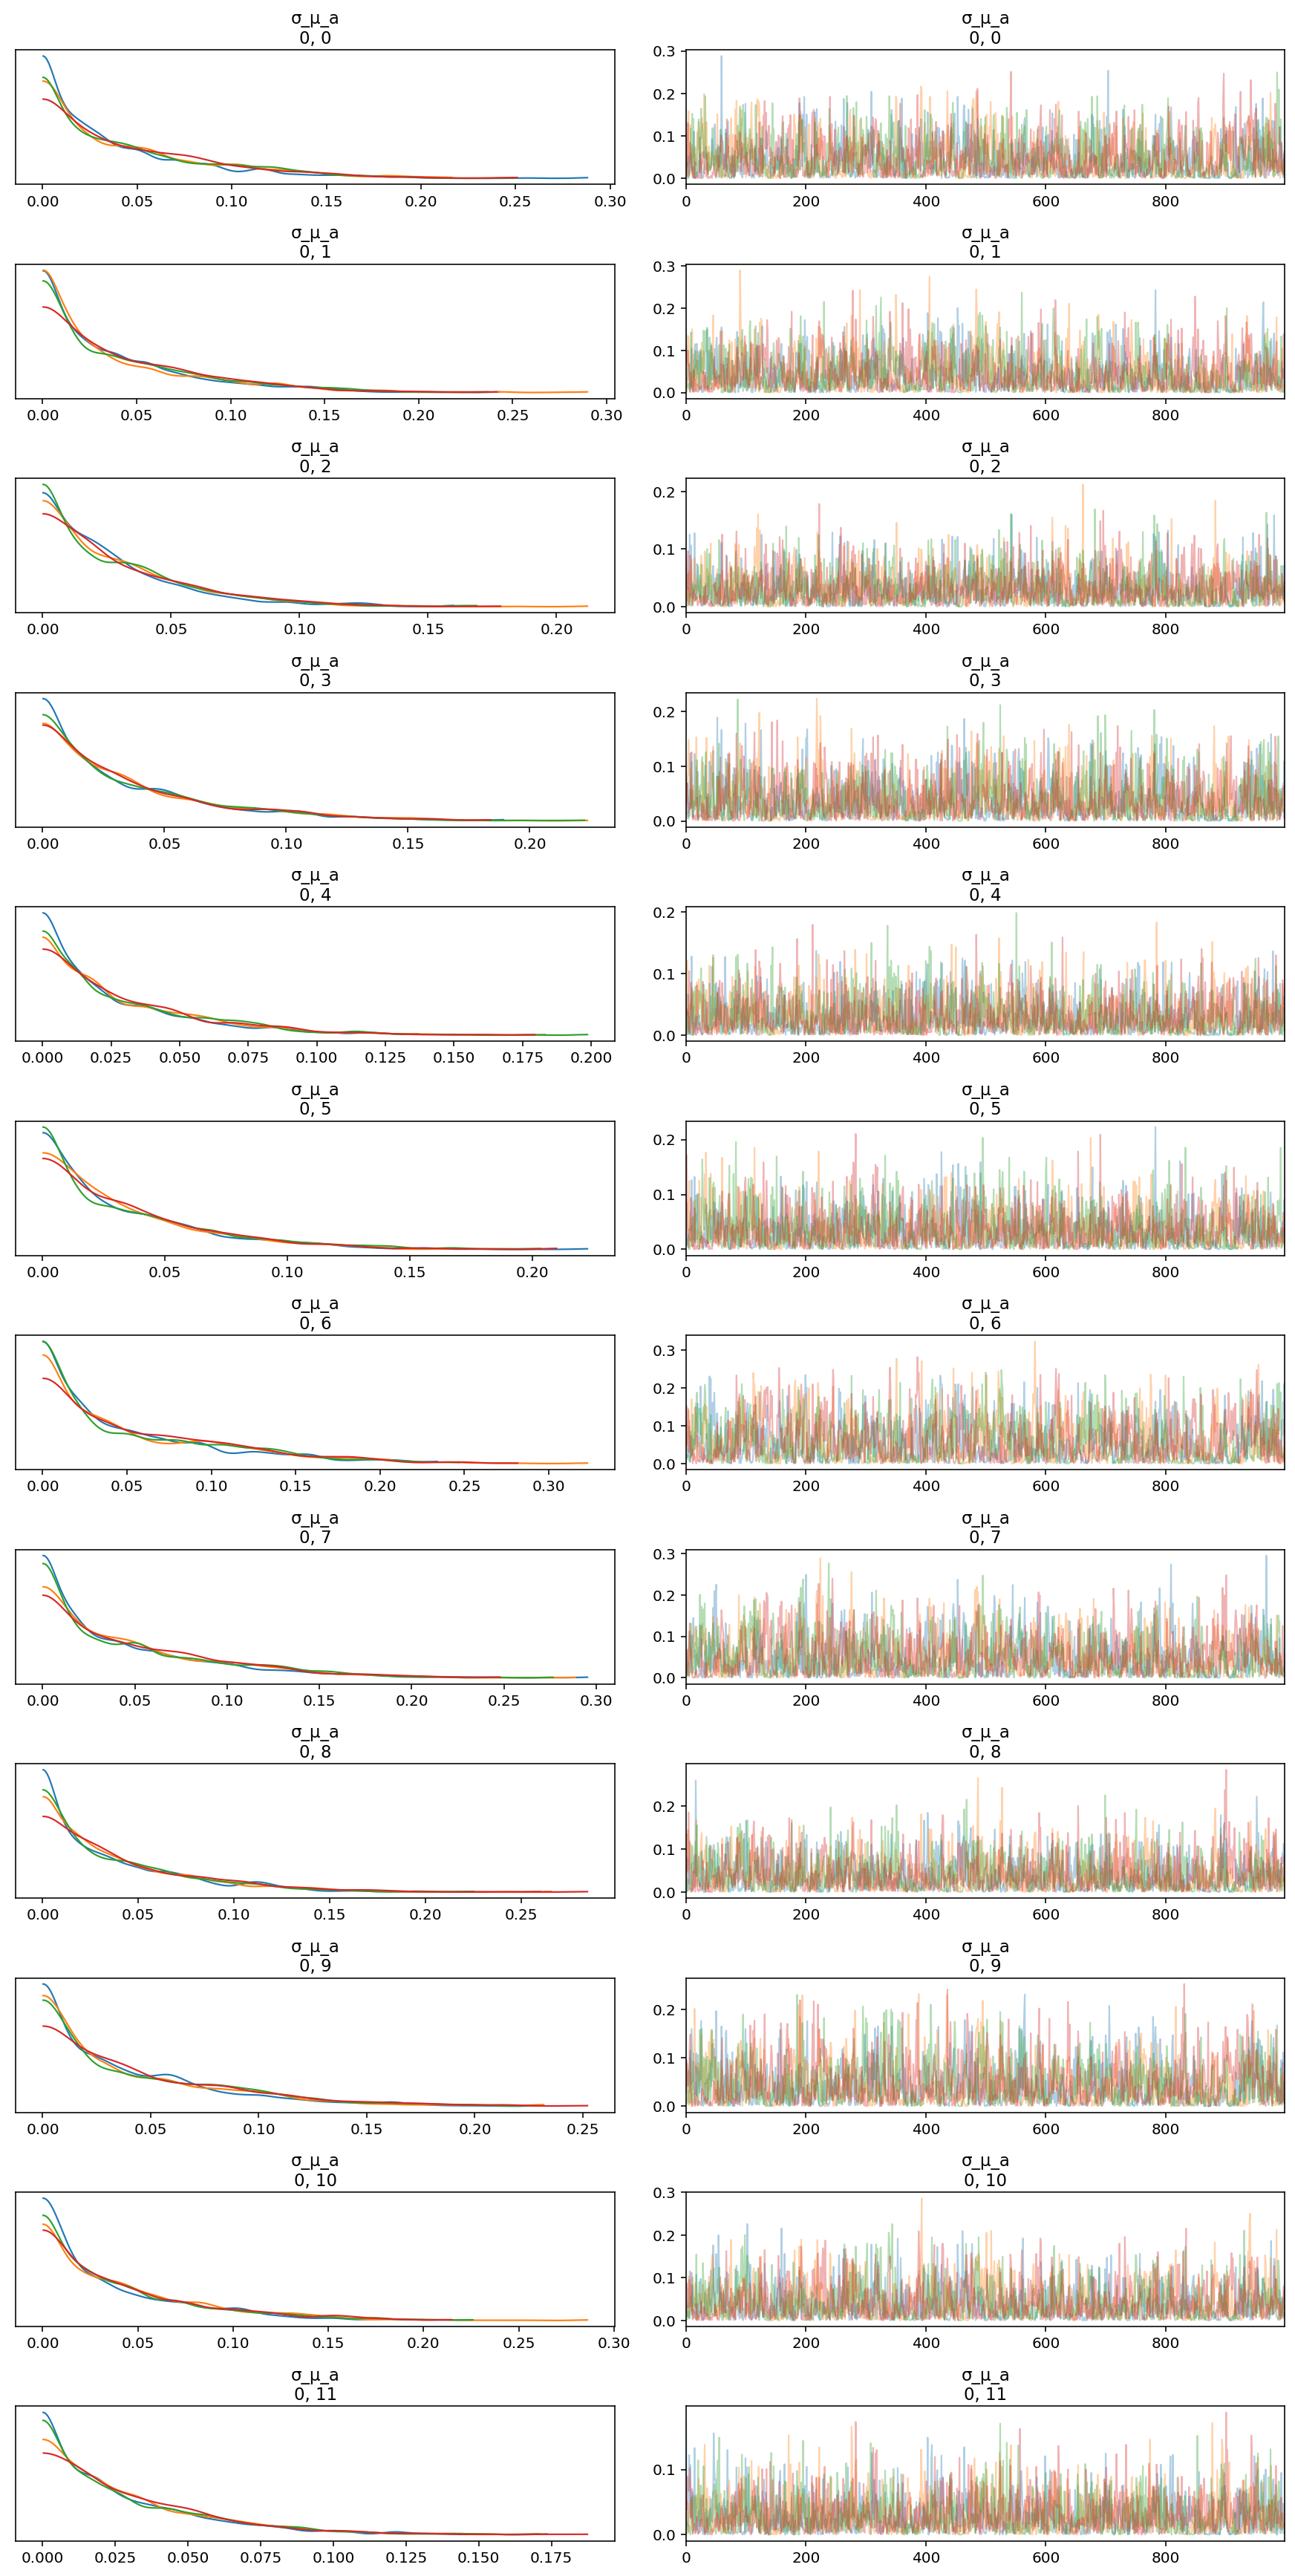

In [20]:
az.plot_trace(sbc_res.inference_obj, "σ_μ_a", compact=False);

In [21]:
az.summary(sbc_res.inference_obj, var_names=["σ_μ_a"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"σ_μ_a[0,0]",0.046,0.044,0.0,0.129,0.001,0.001,743.0,1195.0,1.01
"σ_μ_a[0,1]",0.043,0.042,0.0,0.124,0.001,0.001,791.0,1438.0,1.01
"σ_μ_a[0,2]",0.030,0.028,0.0,0.083,0.001,0.001,978.0,1690.0,1.00
"σ_μ_a[0,3]",0.038,0.036,0.0,0.107,0.001,0.001,1013.0,1692.0,1.00
"σ_μ_a[0,4]",0.030,0.029,0.0,0.084,0.001,0.001,1067.0,1356.0,1.00
"σ_μ_a[0,5]",0.035,0.033,0.0,0.098,0.001,0.001,1160.0,1701.0,1.00
"σ_μ_a[0,6]",0.057,0.054,0.0,0.159,0.002,0.001,665.0,1479.0,1.00
"σ_μ_a[0,7]",0.050,0.047,0.0,0.137,0.002,0.001,676.0,1197.0,1.00
"σ_μ_a[0,8]",0.040,0.039,0.0,0.113,0.001,0.001,960.0,1593.0,1.00
"σ_μ_a[0,9]",0.045,0.043,0.0,0.124,0.001,0.001,748.0,1529.0,1.00


In [22]:
mu_a_posterior = (
    az.summary(mcmc_res, var_names=["μ_a"], hdi_prob=HDI_PROB)
    .reset_index(drop=False)
    .rename(columns={"index": "parameter"})
    .pipe(
        pmanal.extract_matrix_variable_indices,
        col="parameter",
        idx1=genes,
        idx2=cell_lines,
        idx1name="hugo_symbol",
        idx2name="depmap_id",
    )
    .assign(real_values=sbc_res.priors["μ_a"].flatten())
)

mu_a_posterior.head()

,parameter,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,hugo_symbol,depmap_id,real_values
0,"μ_a[0,0]",-0.032,0.062,-0.125,0.065,0.001,0.001,5640.0,3012.0,1.0,gene0,cellline0,5.929023
1,"μ_a[0,1]",-0.054,0.068,-0.152,0.039,0.001,0.001,3402.0,2748.0,1.0,gene0,cellline8,5.991952
2,"μ_a[0,2]",-0.029,0.048,-0.104,0.039,0.001,0.001,5199.0,3303.0,1.0,gene0,cellline9,2.471928
3,"μ_a[0,3]",-0.027,0.055,-0.104,0.063,0.001,0.001,5794.0,2830.0,1.0,gene0,cellline11,2.650764
4,"μ_a[0,4]",-0.020,0.047,-0.095,0.048,0.001,0.001,5646.0,3491.0,1.0,gene0,cellline1,2.629355


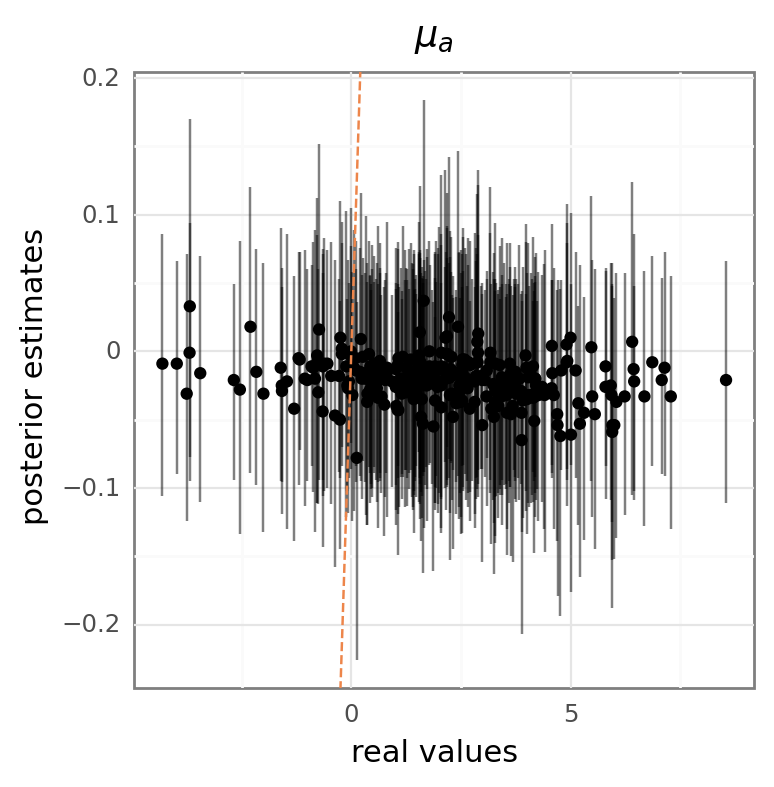

<ggplot: (360932226)>

In [23]:
(
    gg.ggplot(mu_a_posterior, gg.aes(x="real_values", y="mean"))
    + gg.geom_linerange(gg.aes(ymin="hdi_5.5%", ymax="hdi_94.5%"), alpha=0.5)
    + gg.geom_point()
    + gg.geom_abline(slope=1, intercept=0, linetype="--", color=SeabornColor.orange)
    + gg.labs(x="real values", y="posterior estimates", title=r"$\mu_a$")
)

## Posterior predictions

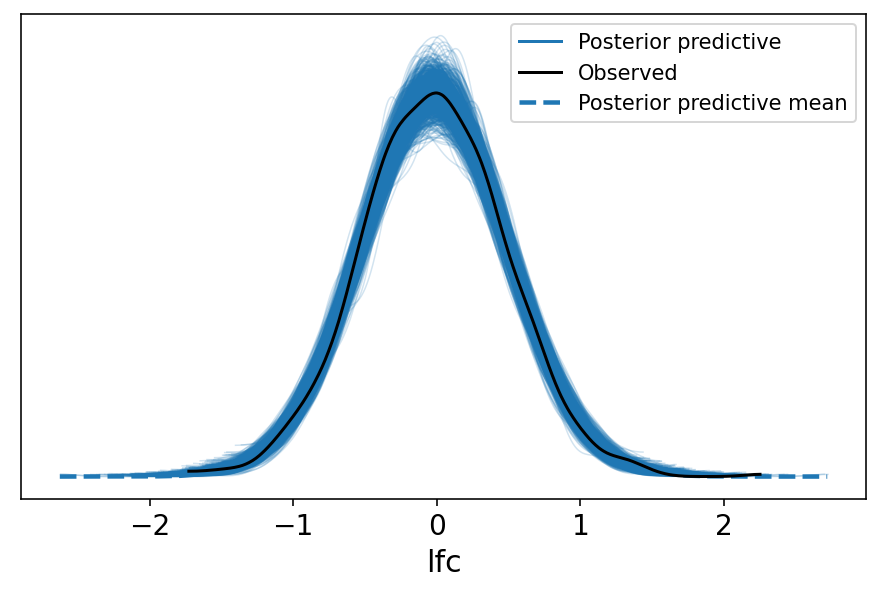

In [24]:
az.plot_ppc(sbc_res.inference_obj);

In [25]:
sp7_ppc_values = sbc_res.inference_obj.posterior_predictive["lfc"].values.squeeze()
sp7_ppc_hdi = az.hdi(sp7_ppc_values, hdi_prob=HDI_PROB)
sp7_ppc = pd.DataFrame(
    {
        "ppc_mean": sp7_ppc_values.mean(axis=0),
        "ppc_hdi_low": sp7_ppc_hdi[:, 0],
        "ppc_hdi_high": sp7_ppc_hdi[:, 1],
    }
)

sp7_ppc

/usr/local/Caskroom/miniconda/base/envs/speclet/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions


,ppc_mean,ppc_hdi_low,ppc_hdi_high
0,0.033477,-0.748185,0.790859
1,-0.110660,-0.856784,0.740223
2,0.014527,-0.759817,0.866590
3,-0.017148,-0.791443,0.739865
4,-0.060205,-0.941354,0.710113
...,...,...,...
1495,-0.049071,-0.723034,0.749537
1496,-0.020614,-0.816073,0.775532
1497,0.042477,-0.761113,0.849195
1498,-0.016349,-0.806738,0.718600


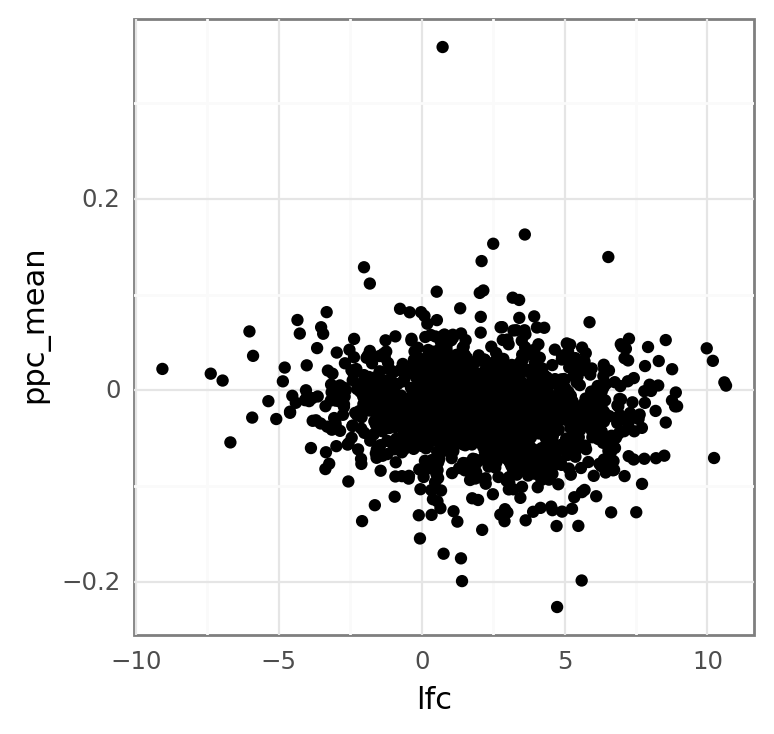

<ggplot: (357987949)>

In [26]:
mock_data_ppc = mock_data.merge(sp7_ppc, left_index=True, right_index=True)

(gg.ggplot(mock_data_ppc, gg.aes(x="lfc", y="ppc_mean")) + gg.geom_point())

---

In [27]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 7.85 minutes


In [28]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2021-06-14

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

Compiler    : Clang 11.0.1 
OS          : Darwin
Release     : 20.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit

Hostname: JHCookMac.local

Git branch: sp7

plotnine  : 0.7.1
theano    : 1.0.5
pymc3     : 3.11.1
numpy     : 1.20.1
matplotlib: 3.3.4
seaborn   : 0.11.1
pandas    : 1.2.3
arviz     : 0.11.2
re        : 2.2.1

